Problem statement: In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/Nikhil-V98/Analyticsvidhya/main/Time_Series_Forecasting/Train_SU63ISt.csv")

In [6]:
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


`Spliting train and test in 80:20`


In [7]:
train = df[0:round(df.shape[0]*0.8)]
test = df[round(df.shape[0]*0.8):]

In [8]:
def processing(df):
        df.Timestamp = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M')
        df.index = df.Timestamp
        df = df.resample('D').mean()
        df.drop('ID',1,inplace = True)
        return df

In [9]:
train = processing(train)
test =processing(test)

df =processing(df)

<Figure size 7200x2160 with 0 Axes>

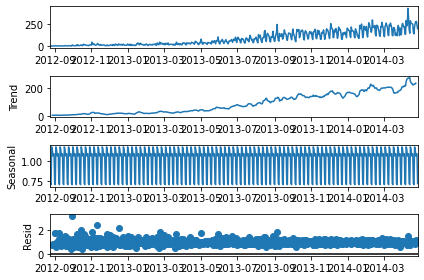

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pyplot import figure
plt.figure(figsize=(100,30))
decompose = seasonal_decompose(train, model='multiplicative')
decompose.plot()
plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result = adfuller(series.dropna(),autolag='AIC')
    if result[1] <= 0.05:
        print("Data  is stationary")
    else:
        print("Data  is non-stationary")

In [12]:
df["Count_diff"] = df["Count"]- df["Count"].shift(12)
df["Count_diff"].dropna(inplace=True)

In [13]:
adf_test(df["Count_diff"])

Data  is stationary


In [14]:
df.head(20)

,Count,Count_diff
Datetime,,
2012-08-25,3.166667,NaN
2012-08-26,3.666667,NaN
2012-08-27,2.583333,NaN
2012-08-28,2.416667,NaN
2012-08-29,2.500000,NaN
2012-08-30,3.083333,NaN
2012-08-31,3.250000,NaN
2012-09-01,4.666667,NaN
2012-09-02,4.916667,NaN


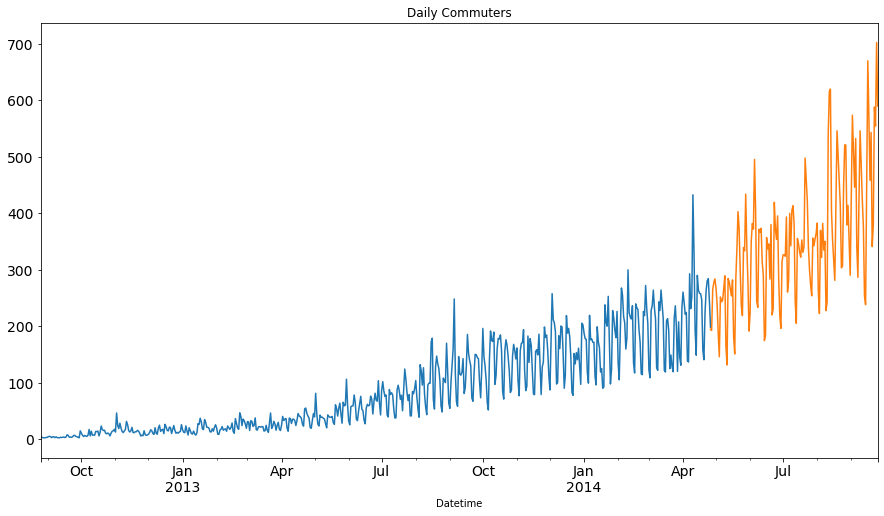

In [15]:

train.Count.plot(figsize=(15,8), title= 'Daily Commuters', fontsize=14)
test.Count.plot(figsize=(15,8), title= 'Daily Commuters', fontsize=14)
plt.show()

In [16]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['Count'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Count   No. Observations:                  762
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3991.798
Date:                Sun, 21 Aug 2022   AIC                           7989.596
Time:                        12:33:07   BIC                           8003.500
Sample:                    08-25-2012   HQIC                          7994.950
                         - 09-25-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4597      0.024     19.164      0.000       0.413       0.507
ma.L1         -0.9376      0.011    -83.844      0.000      -0.959      -0.916
sigma2      2103.7119     59.225     35.521      0.000    1987.634    2219.790
===================================================================================
Ljung-Box (L1) (Q):                  16.53   Jarque-Bera (JB):               783.66
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              85.94   Skew:                             0.99
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
from math import sqrt
from sklearn.metrics import mean_squared_error
y_hat_avg = model_fit.forecast(len(test))
rms = sqrt(mean_squared_error(test.Count, y_hat_avg))
print(rms)

170.05152282632733


In [ ]:
from statsmodels.tsa.arima.model import A
model=ARIMA(df['Count'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()